# seqNMF Demo

This notebook demonstrates the seqNMF to both synthetic data and songbird data (provided by Emily Mackevicius).

## Setup

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import scipy.io

import cnmfpy.regularize as reg
import cnmfpy.optimize as opt
import cnmfpy.conv as conv

from cnmfpy import CNMF
from cnmfpy.tests import seq_nmf_data
%matplotlib inline

## Generate synthetic data

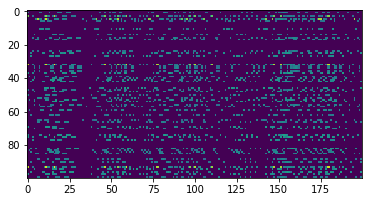

In [3]:
N = 100  # Number of neurons
T = 200  # Length of data in time
L = 10  # Max time lag
K = 2  # Number of factors
sparsity=0.75

data, Wreal, Hreal = seq_nmf_data(N, T, L, K, sparsity)

plt.imshow(data)
plt.show()

## Fit synthetic data

Let's try fitting a simple, single sequence model.

In [7]:
#Hreal /= la.norm(Hreal, axis=-1, keepdims=True)  # normalize

lam = 10**(-6)
model = CNMF(3, 10)
model.fit(data, alg='mult');

100%|██████████| 100/100 [00:00<00:00, 102.06it/s]


Reconstruction Error:  0.114589808903


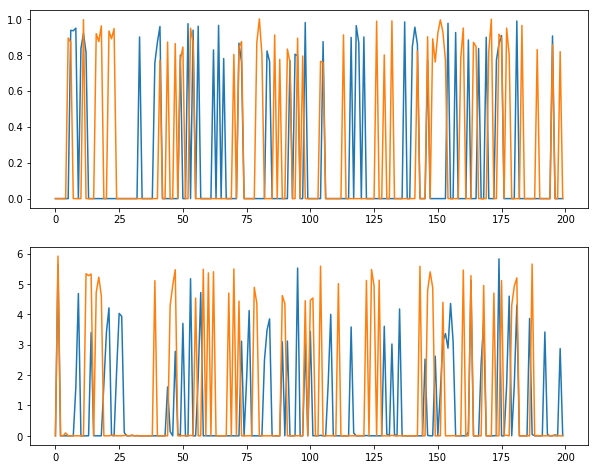

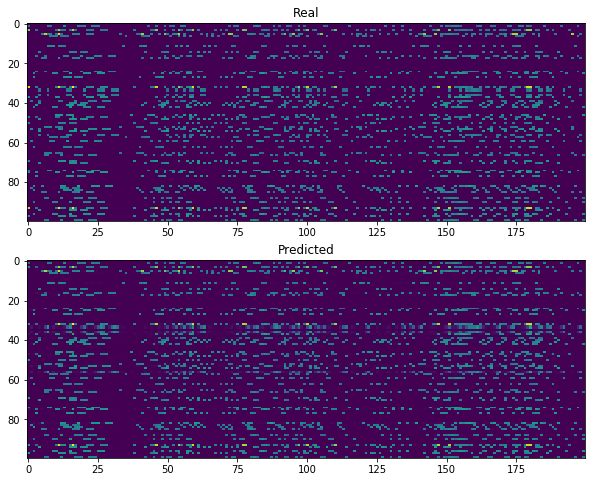

In [8]:
error = data - model.predict()
print('Reconstruction Error: ', la.norm(error) / la.norm(data))


plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(range(T), Hreal[0])
plt.plot(range(T), Hreal[1])

plt.subplot(2,1,2)
plt.plot(range(T), model.H.shift(0)[0])
plt.plot(range(T), model.H.shift(0)[1])

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.imshow(data, aspect='auto')
plt.title('Real')

plt.subplot(2,1,2)
plt.imshow(model.predict(), aspect='auto')
plt.title('Predicted')

plt.show()

## Load songbird data

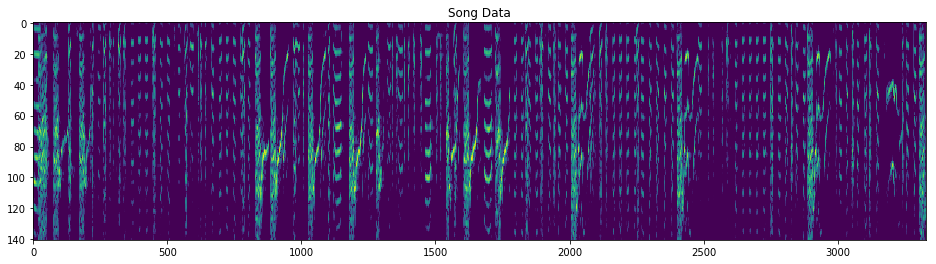

In [66]:
mat_data = scipy.io.loadmat('data/MackeviciusData.mat')
song_data = mat_data['SONG']

song_start = 0
song_end = int((3 / 4.) * song_data.shape[1])

song_train = song_data[:, song_start:song_end]

plt.figure(figsize=(16, 4))
plt.imshow(song_train, aspect='auto')
plt.title('Song Data')
plt.show()

## Fit songbird data

In [67]:
lag = 0.2  # seconds
sL = int(np.ceil(lag * mat_data['SONGfs']))
components = 8

model = CNMF(components, sL, l2_scfo=3e-4, n_iter_max=1000)
model.fit(song_train, alg='mult')


100%|██████████| 1000/1000 [15:25<00:00,  1.08it/s]


Reconstruction Error:  0.603360008812


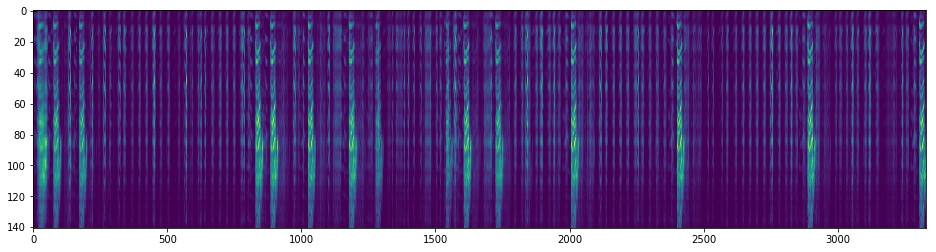

In [73]:
song_est = model.predict()
error = song_est - song_train
print("Reconstruction Error: ", la.norm(error) / la.norm(song_train))
plt.figure(figsize=(16,4))
plt.imshow(song_est, aspect='auto')
plt.show()

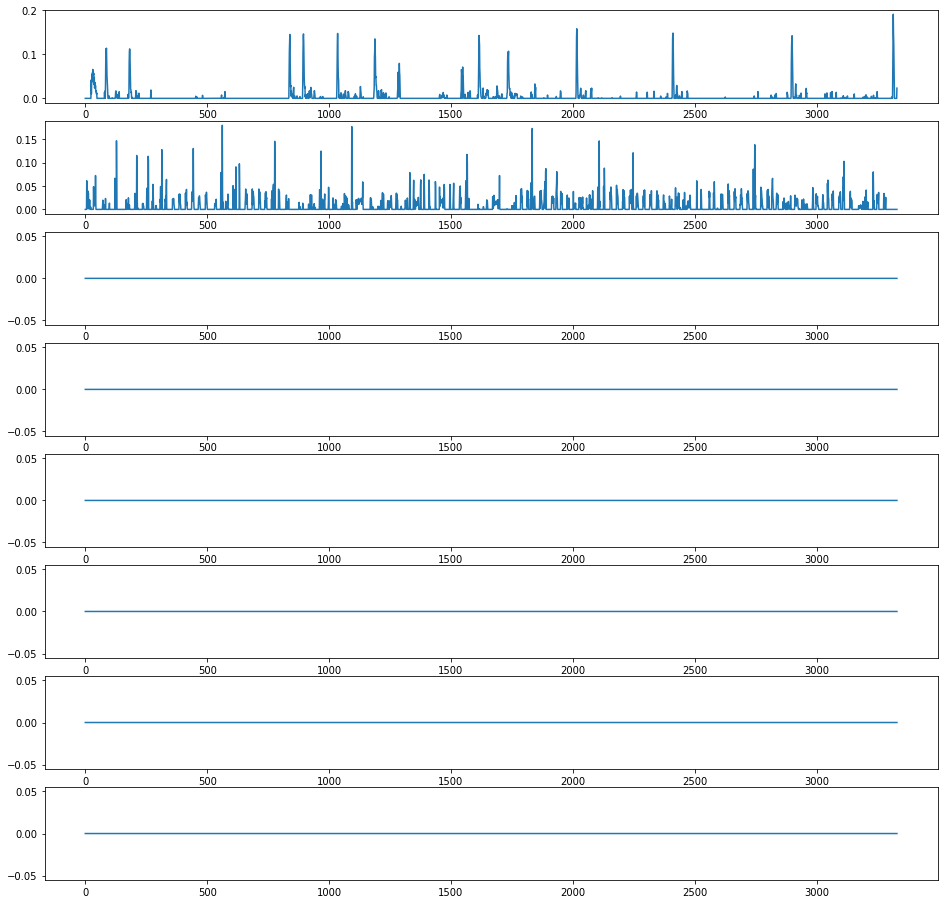

In [69]:
plt.figure(figsize=(16,16))

for i in range(components):
    plt.subplot(components, 1, i+1)
    plt.plot(model.H.shift(0)[i])